In [1]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [2]:
#!pip3 install scikit-learn -q

In [3]:
import pandas as pd 
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

/home/olgan96/.env/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
def drug_response_curve(x, Einf, EC50, HS, E0=100):
    y = Einf + (E0 - Einf)/(1 + (x/EC50)**HS)
    return y

In [5]:
def r2_drug_response(df):
    dose_response = df['dose_response'].values
    Einf = df['Einf'].values
    EC50 = df['EC50'].values
    HS = df['HS'].values
    r2 = np.zeros(len(dose_response))
    for i in range(len(dose_response)):
        doses_i = []
        responses_i = []
        responses_pred_i = []
        for j in range(len(dose_response[i])):
            doses_i.append(dose_response[i][j]['dose'])
            responses_i.append(dose_response[i][j]['response'])
        for dose in doses_i:
            responses_pred_i.append(drug_response_curve(dose, Einf[i], EC50[i], HS[i]).item())
        
        r2[i] = r2_score(responses_i, responses_pred_i)
        #print(r2_score(responses_i, responses_pred_i))
        #break
    return r2

In [6]:
def calc_responses(df, dose):
    Einf = df['Einf'].values
    EC50 = df['EC50'].values
    HS = df['HS'].values
    n_curves = df.shape[0]
    #r2 = np.zeros(len(dose_response))
    responses_pred = np.zeros(n_curves)
    for i in range(n_curves):
        responses_pred[i] = drug_response_curve(dose, Einf[i], EC50[i], HS[i]).item()
    return responses_pred

In [7]:
df = pd.read_parquet('../../NO_BACKUP/pharmacodb/response_overlap2.parquet')
df_cnt = df.groupby('dataset').size().reset_index(name='counts')
df_cnt

,dataset,counts
0,CCLE,370
1,CTRPv2,3349
2,FIMM,262
3,GDSC1,2691
4,GDSC2,6337
5,GRAY,358
6,NCI60,17897
7,PRISM,10275
8,UHNBreast,31
9,gCSI,383


In [10]:
df#['dose_response']#.iloc[0]

,exp_id,id_x,uid,compound,tissue,HS,Einf,EC50,AAC,IC50,...,DSS2,DSS3,dose_response,dataset,cell_line_id,comp_cell_line,inchikey,id_y,accession_id,cell_drug
0,22049,27954,PDBC00031,Afatinib,Bladder/Urinary Tract,0.428398,0.000000,0.099338,0.599499,0.099338,...,None,None,"[{'__typename': 'DoseResponse', 'dose': 0.002,...",CTRPv2,18,Afatinib18,ULXXDDBFHOBEHA-CWDCEQMOSA-N,18,CVCL_0126,CVCL_0126ULXXDDBFHOBEHA-CWDCEQMOSA-N
1,22050,27954,PDBC00031,Afatinib,Bladder/Urinary Tract,4.000000,70.027150,0.040786,0.135470,NaN,...,None,None,"[{'__typename': 'DoseResponse', 'dose': 0.0019...",GDSC1,18,Afatinib18,ULXXDDBFHOBEHA-CWDCEQMOSA-N,18,CVCL_0126,CVCL_0126ULXXDDBFHOBEHA-CWDCEQMOSA-N
2,22052,27954,PDBC00031,Afatinib,Bladder/Urinary Tract,0.449738,0.000000,0.957546,0.396877,0.957546,...,None,None,"[{'__typename': 'DoseResponse', 'dose': 0.0100...",GDSC2,18,Afatinib18,ULXXDDBFHOBEHA-CWDCEQMOSA-N,18,CVCL_0126,CVCL_0126ULXXDDBFHOBEHA-CWDCEQMOSA-N
3,22053,27954,PDBC00031,Afatinib,Bladder/Urinary Tract,0.512507,0.000000,1.277055,0.359764,1.277055,...,None,None,"[{'__typename': 'DoseResponse', 'dose': 0.0100...",GDSC2,18,Afatinib18,ULXXDDBFHOBEHA-CWDCEQMOSA-N,18,CVCL_0126,CVCL_0126ULXXDDBFHOBEHA-CWDCEQMOSA-N
4,22054,27954,PDBC00031,Afatinib,Bladder/Urinary Tract,0.349546,0.000000,0.569615,0.454161,0.569615,...,None,None,"[{'__typename': 'DoseResponse', 'dose': 0.0100...",GDSC2,18,Afatinib18,ULXXDDBFHOBEHA-CWDCEQMOSA-N,18,CVCL_0126,CVCL_0126ULXXDDBFHOBEHA-CWDCEQMOSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41948,6290254,35996,PDBC00066,Lapatinib,Uterus,0.000000,98.088948,0.002543,0.009555,NaN,...,None,None,"[{'__typename': 'DoseResponse', 'dose': 0.0006...",PRISM,1694,Lapatinib1694,BCFGMOOMADDAQU-UHFFFAOYSA-N,1694,CVCL_2112,CVCL_2112BCFGMOOMADDAQU-UHFFFAOYSA-N
41949,6290255,35996,PDBC00066,Lapatinib,Uterus,4.000000,44.721197,0.054851,0.296542,0.096225,...,None,None,"[{'__typename': 'DoseResponse', 'dose': 0.0006...",PRISM,1694,Lapatinib1694,BCFGMOOMADDAQU-UHFFFAOYSA-N,1694,CVCL_2112,CVCL_2112BCFGMOOMADDAQU-UHFFFAOYSA-N
41950,6290621,49477,PDBC02296,Osimertinib,Uterus,0.196221,0.000000,3565.616083,0.097812,3565.616083,...,None,None,"[{'__typename': 'DoseResponse', 'dose': 0.0010...",GDSC2,1694,Osimertinib1694,DUYJMQONPNNFPI-UHFFFAOYSA-N,1694,CVCL_2112,CVCL_2112DUYJMQONPNNFPI-UHFFFAOYSA-N
41951,6290622,49477,PDBC02296,Osimertinib,Uterus,4.000000,28.385232,2.823444,0.093445,3.482042,...,None,None,"[{'__typename': 'DoseResponse', 'dose': 0.0006...",PRISM,1694,Osimertinib1694,DUYJMQONPNNFPI-UHFFFAOYSA-N,1694,CVCL_2112,CVCL_2112DUYJMQONPNNFPI-UHFFFAOYSA-N


In [11]:
#remove experiments with the unknown constants
df = df[~df[['HS', 'Einf', 'EC50']].isna().any(axis=1)].reset_index(drop=True)
#calc r2 score of fitting drug-response curve
df['r2'] = r2_drug_response(df)

([<matplotlib.axis.XTick at 0x7fc2af90d0d0>], [Text(1, 0, 'r2_pos')])

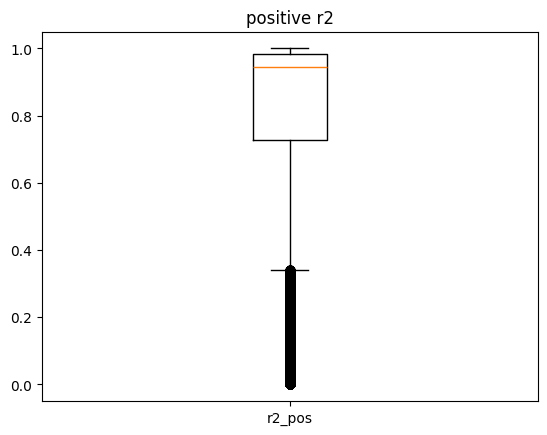

In [12]:
plt.title('positive r2')
plt.boxplot(df[df['r2'] > 0]['r2'])
plt.xticks([1], ['r2_pos'])
#plt.ylim([-500, 1])

([<matplotlib.axis.XTick at 0x7fc2af8f19d0>], [Text(1, 0, 'r2_neg')])

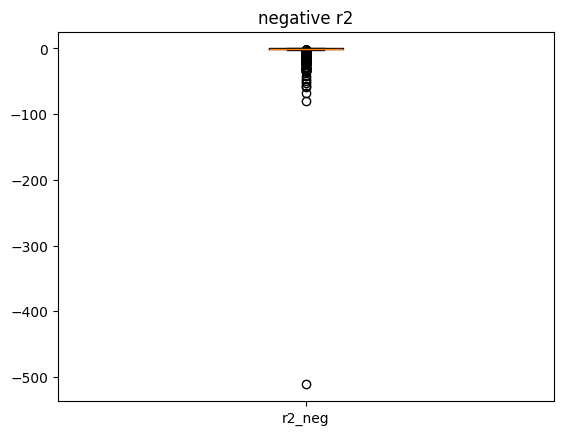

In [13]:
plt.title('negative r2')
plt.boxplot(df[df['r2'] <= 0]['r2'])
plt.xticks([1], ['r2_neg'])
#plt.ylim([-500, 1])

In [14]:
len(df[df['r2'] > 0.7]['id_x'].unique())

817

In [15]:
len(df[df['r2'] > 0.7]['cell_drug'].unique())

6026

In [28]:
df_top_r2 = df[df['r2'] > 0.7].reset_index(drop=True)

In [29]:
df_top_r2_cnt = df_top_r2.groupby('dataset').size().reset_index(name='counts')

In [30]:
df_top_r2_cnt['fraction'] = df_top_r2_cnt['counts']/df.groupby('dataset').size().reset_index(name='counts')['counts']

(array([  616.,   685.,   747.,   878.,  1004.,  1263.,  1569.,  2274.,
         4863., 13231.]),
 array([0.70006922, 0.73006222, 0.76005523, 0.79004823, 0.82004123,
        0.85003423, 0.88002723, 0.91002024, 0.94001324, 0.97000624,
        0.99999924]),
 <BarContainer object of 10 artists>)

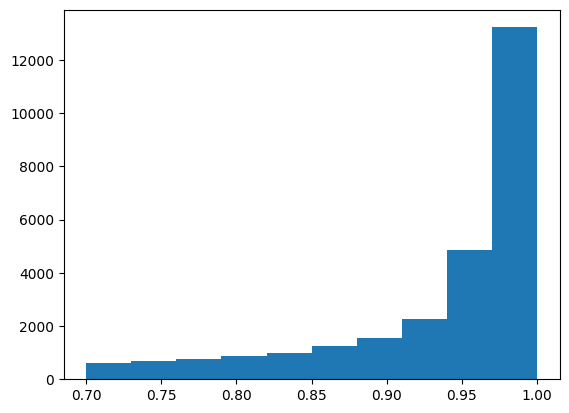

In [31]:
plt.hist(df_top_r2['r2'])

In [33]:
df_top_r2.rename(columns={'id_x': 'compound_id', 'id_y': 'cellline_id'}).to_parquet('../../NO_BACKUP/pharmacodb/drug_response_curves_agg_r2_top0.7.parquet', index=False)

In [42]:
df_top_r2_explode = df_top_r2.explode('dose_response')

In [50]:
df_top_r2_explode['response_pred'] = df_top_r2_explode.apply(lambda x: drug_response_curve(x.dose_response['dose'], x.Einf, x.EC50, x.HS), axis=1)

In [55]:
r2_score(df_top_r2_explode.dose_response.str['response'], df_top_r2_explode['response_pred'])

0.941048483727048

(array([ 8210.,  8505., 11629., 16720., 13527., 11536., 10464., 10767.,
        13416., 73512.]),
 array([7.47249692e-13, 1.00000000e+01, 2.00000000e+01, 3.00000000e+01,
        4.00000000e+01, 5.00000000e+01, 6.00000000e+01, 7.00000000e+01,
        8.00000000e+01, 9.00000000e+01, 1.00000000e+02]),
 <BarContainer object of 10 artists>)

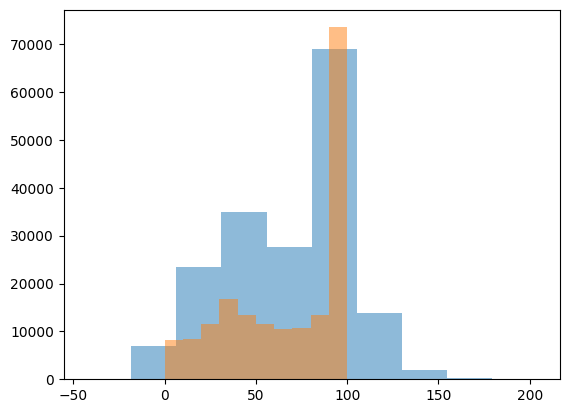

In [58]:
plt.hist(df_top_r2_explode.dose_response.str['response'], alpha=0.5)
plt.hist(df_top_r2_explode['response_pred'], alpha=0.5)

(array([ 8210.,  8505., 11629., 16720., 13527., 11536., 10464., 10767.,
        13416., 73512.]),
 array([7.47249692e-13, 1.00000000e+01, 2.00000000e+01, 3.00000000e+01,
        4.00000000e+01, 5.00000000e+01, 6.00000000e+01, 7.00000000e+01,
        8.00000000e+01, 9.00000000e+01, 1.00000000e+02]),
 <BarContainer object of 10 artists>)

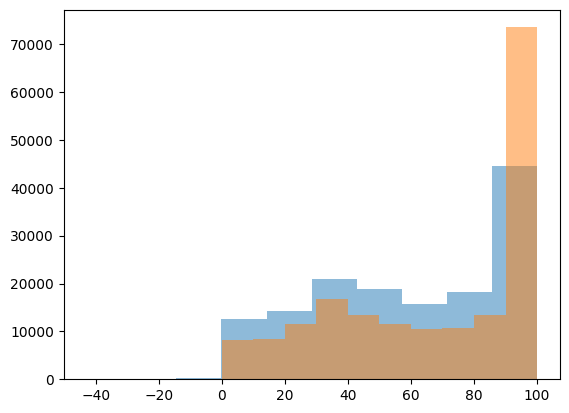

In [63]:
plt.hist(df_top_r2_explode[df_top_r2_explode.dose_response.str['response']<100].dose_response.str['response'], alpha=0.5)
plt.hist(df_top_r2_explode['response_pred'], alpha=0.5)

(array([0.00460496, 0.00477043, 0.00652267, 0.00937819, 0.00758725,
        0.0064705 , 0.00586922, 0.00603917, 0.00752499, 0.04123263]),
 array([7.47249692e-13, 1.00000000e+01, 2.00000000e+01, 3.00000000e+01,
        4.00000000e+01, 5.00000000e+01, 6.00000000e+01, 7.00000000e+01,
        8.00000000e+01, 9.00000000e+01, 1.00000000e+02]),
 <BarContainer object of 10 artists>)

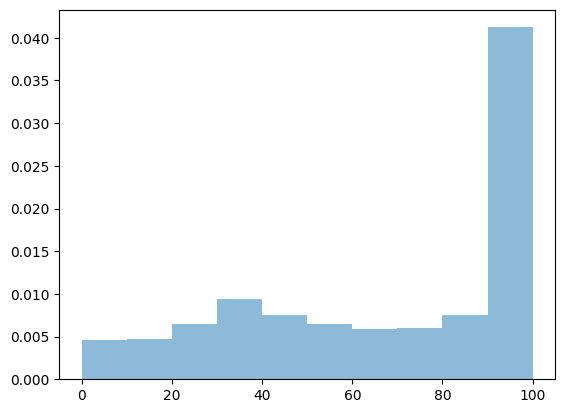

In [62]:
plt.hist(df_top_r2_explode['response_pred'], density=True, alpha=0.5)

(array([3.0000e+01, 1.3460e+03, 1.4624e+04, 4.5928e+04, 5.8500e+04,
        3.9282e+04, 1.8381e+04, 1.4700e+02, 2.4000e+01, 2.4000e+01]),
 array([-7.     , -5.48239, -3.96478, -2.44717, -0.92956,  0.58805,
         2.10566,  3.62327,  5.14088,  6.65849,  8.1761 ]),
 <BarContainer object of 10 artists>)

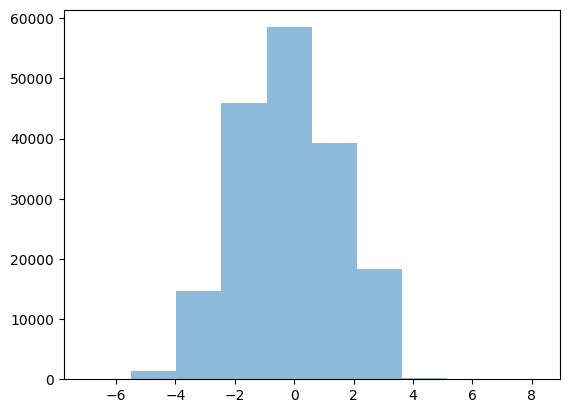

In [61]:
plt.hist(np.log10(df_top_r2_explode.dose_response.str['dose']), alpha=0.5)

### Test

In [34]:
doses_ = [0.01,
 0.06327333,
 0.1,
 0.20007026,
 0.24997697,
 0.63262216,
 1.0,
 2.00035126,
 2.4997697,
 6.32511069,
 10.0,
 20.0,
 24.99769702,
 100.0,
 249.97697022,
 2499.76970218]

In [35]:
df_top_r2[df_top_r2['cell_drug'] == 'CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N']#['r2']

,exp_id,id_x,uid,compound,tissue,HS,Einf,EC50,AAC,IC50,...,DSS3,dose_response,dataset,cell_line_id,comp_cell_line,inchikey,id_y,accession_id,cell_drug,r2
13667,2787293,23375,PDBC00173,5-Fluorouracil,Lung,1.342168,54.790014,4.586092,0.146251,NaN,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0041...",CTRPv2,743,5-Fluorouracil743,GHASVSINZRGABV-UHFFFAOYSA-N,743,CVCL_0023,CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N,0.967413
13668,2787294,23375,PDBC00173,5-Fluorouracil,Lung,1.710832,36.759379,8.122193,0.169507,17.659248,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0041...",CTRPv2,743,5-Fluorouracil743,GHASVSINZRGABV-UHFFFAOYSA-N,743,CVCL_0023,CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N,0.979971
13669,2787295,23375,PDBC00173,5-Fluorouracil,Lung,4.000000,37.492632,0.524415,0.329513,0.741525,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0632...",GDSC2,743,5-Fluorouracil743,GHASVSINZRGABV-UHFFFAOYSA-N,743,CVCL_0023,CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N,0.929694
13670,2787296,23375,PDBC00173,5-Fluorouracil,Lung,4.000000,30.080837,1.999502,0.233109,2.516788,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0632...",GDSC2,743,5-Fluorouracil743,GHASVSINZRGABV-UHFFFAOYSA-N,743,CVCL_0023,CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N,0.983026
13671,2787297,23375,PDBC00173,5-Fluorouracil,Lung,4.000000,23.164912,1.677630,0.275690,1.960031,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0632...",GDSC2,743,5-Fluorouracil743,GHASVSINZRGABV-UHFFFAOYSA-N,743,CVCL_0023,CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N,0.861334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2789134,23375,PDBC00173,5-Fluorouracil,Lung,1.091006,39.204197,1.468914,0.482897,5.986612,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.2499...",NCI60,743,5-Fluorouracil743,GHASVSINZRGABV-UHFFFAOYSA-N,743,CVCL_0023,CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N,0.967961
15494,2789135,23375,PDBC00173,5-Fluorouracil,Lung,0.774263,38.124642,2.789281,0.444687,17.858191,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.2499...",NCI60,743,5-Fluorouracil743,GHASVSINZRGABV-UHFFFAOYSA-N,743,CVCL_0023,CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N,0.959416
15495,2789136,23375,PDBC00173,5-Fluorouracil,Lung,0.564232,35.594808,0.945477,0.504549,8.580323,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.2499...",NCI60,743,5-Fluorouracil743,GHASVSINZRGABV-UHFFFAOYSA-N,743,CVCL_0023,CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N,0.973218
15496,2789137,23375,PDBC00173,5-Fluorouracil,Lung,1.048127,34.196347,0.879838,0.338019,2.640260,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.01, ...",NCI60,743,5-Fluorouracil743,GHASVSINZRGABV-UHFFFAOYSA-N,743,CVCL_0023,CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N,0.995647


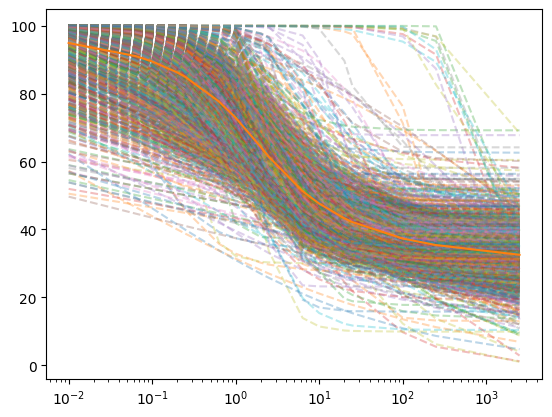

In [38]:
resp = []
for dose in doses_:
    resp.append(calc_responses(df_top_r2[df_top_r2['cell_drug'] == 'CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N'], dose))
resp = np.array(resp).T
for i in range(len(resp)):
    plt.plot(doses_, resp[i], '--', alpha=0.3)
    plt.xscale('log')
plt.plot(doses_, resp.mean(0))

### the old version (top 5%); not reproducible, take a look at week_1/08_* notebook

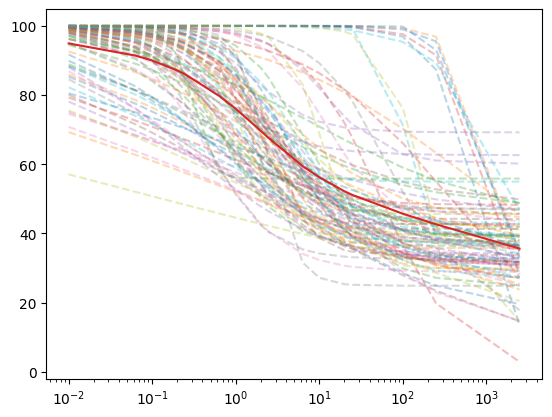

In [73]:
resp = []
for dose in doses_:
    resp.append(calc_responses(df_r2_pos[df_r2_pos['cell_drug'] == 'CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N'], dose))
resp = np.array(resp).T
for i in range(len(resp)):
    plt.plot(doses_, resp[i], '--', alpha=0.3)
    plt.xscale('log')
plt.plot(doses_, resp.mean(0))

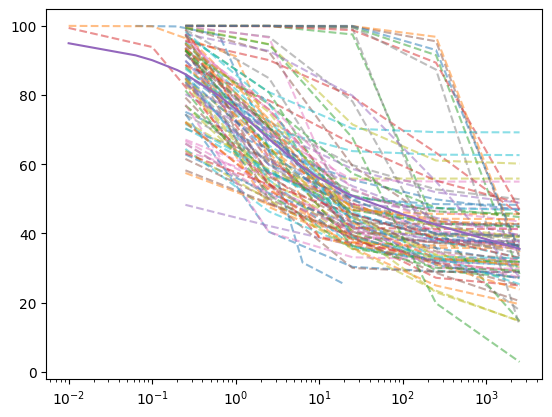

In [62]:
from sklearn.metrics import r2_score
r2 = []
resp_avg = {}
resp_cnt = {}
df_test = df[df['cell_drug'] == 'CVCL_0023GHASVSINZRGABV-UHFFFAOYSA-N']
for j in range(len(df_test)):
    doses = []
    responses = []
    for i in range(len(df_test.iloc[j]['dose_response'])):
        doses.append(df_test.iloc[j]['dose_response'][i]['dose'])
        responses.append(df_test.iloc[j]['dose_response'][i]['response'])
    r_pred = []
    for dose in doses:
        r_pred.append(drug_response_curve(dose, df_test.iloc[j]['Einf'], df_test.iloc[j]['EC50'], df_test.iloc[j]['HS']).item())
    r2.append(r2_score(responses, r_pred))
    if r2[-1] > 0.99:
        for i in range(len(doses_)):
            if not doses_[i] in resp_avg.keys():
                resp_avg[doses_[i]] = 0
                resp_cnt[doses_[i]] = 0
            resp_avg[doses_[i]] += drug_response_curve(doses_[i], df_test.iloc[j]['Einf'], df_test.iloc[j]['EC50'], df_test.iloc[j]['HS']).item()
            resp_cnt[doses_[i]] += 1
        plt.plot(doses, r_pred, '--', alpha=0.5)
        #plt.plot(doses, responses)
        plt.xscale('log')
        #plt.show()

#doses_ = []
resp_avg_ = []
for key in sorted(resp_avg.keys()):
    resp_avg_.append(resp_avg[key]/resp_cnt[key])
#    #doses_.append(key)
plt.plot(doses_, resp_avg_)
plt.xscale('log')